# <u>Project: Benchmarking Sorting Algorithms</u>

## 1. Introduction


Sorting algorithms put items in an array into ascending or descending order. Much early research on computing algorithms was focused on sorting. Due to computers' limited ability to store data in memory, algorithms had to be developed to sort through data efficiently (Heineman et al., 2010, P.57). Sorting algorithms are significant for the following key reasons:

* Sorting algorithms are important subroutines in many other algorithms. For example, the binary search algorithm (method to search for an item in the array) requires the array to be sorted (Bhargava, A, 2016, P.21). 

* Sorting is an important function of many real-world applications (Cormen et al., 2009, p. 148). Websites, such as Amazon and Ebay need to be able to sort items by price, time on sale etc. 

* Finally, sorting has been such a focus of algorithm research that a a huge variety of different algorithmic techniques have been used in their development. They are, therefore, a good introduction to algorithm design (Cormen et al., 2009, p. 148).

In this project, i will write an application to benchmark five different sorting algorithms by measuring the average time it takes to sort arrays of different sizes. The algorithms to be benchmarked are below:

1. Selection Sort

2. Insertion Sort

3. Quick Sort

4. Pancake Sort

5. Bucket Sort

Before, i get to the algorithms, i will first have to introduce **big O notation** as a means to measure **time and space complexity** performance of an algorithm. The difference between **comparison** and **non-comparison** sorting algorithms will be examined. Finally, i will touch on the importance of the **stability** of an algorithm and **in-place** sorting.

### 1.1 Big O notation and complexity performance

Measuring and comparing the time it takes a sorting algorithm to complete its task (as we are doing in this project) is one way to benchmark or compare the efficacy of algorithms. However, measuring the time **performance** is not ideal as it is not **platform independent** (Mannion, P, 2019a). It can be influenced by the following:

* The computational power of the specific computer 

* The language the algorithm is written in (algorithms in a high-level language like python would be slower than Java)

* The number of other processes in the computer running at the same time as the algorithm. 

Instead, we compare algorithms using their **time complexity**. We count the number of steps (operations) an algorithm takes to complete a task. Specifically, we observe how quickly the number of operations increase as the input size increases (Mannion, P, 2019a). 

Algorithmic complexity is measured in a best, average and worst case. The best case is achieved when an algorithm has its optimal input, the average case occurs on random inputs and, finally, the worst case is achieved when an algorithm gets its worst possible input (Mannion, P, 2019a). 

When comparing algorithms, we use **big O notation** in the form O(). Algorithms are usually compared on their worst case complexity.   


The following performance families are typically used to measure algorithms (Bhargava, A, 2016, P.20-33).

* **O(1)** *Constant time* The input size does not affect the running time

* **O(log n)** *logarithmic time* The algorithm runs in sub-linear time (eg. a guessing game using <, = and >)

* **O(n)** *linear time* An algorithm's growth is directly proportional to the input size. Bucket sort is O(n) in the average case if the input has a uniform distribution (Cormen et al., 2009, p. 200) 

* **O(n log n)** *worse than linear*. **Comparison based** sorting algorithms do not perform faster than this in the average case (Heineman et al., 2010, P.83).

* **O(n2)** *quadratic time* The times increases exponentially - a slow sorting algorithm like **selection sort**.



While **time complexity** is the most important factor in comparing algorithms, they can also be compared on other attributes (Cormen et al., 2009, p. 23). **Space Complexity** measures the rate of growth in memory usage of an algorithm as the input size increases.

Quick sort has an average **time complexity** of O(n log n), substantially better than Insertion Sort's O(n2), but Quick Sort has a worse **space complexity**. Due to its use of recursion, Quick sort uses more memory as more unfinished functions are pushed on the stack.

Insertion Sort is an iterative algorithm so its **space complexity** is constant O(1) (bigocheatsheet, n.d).
**Space complexity** may be a factor if you are interested in the efficent use of computational power, but i will be focused on **time complexity** in this study. 



### Comparison vs. Non-Comparison Algorithms 

**Comparison sorts** order the array only by comparing elements in the array to each other. **Selection sort**, **Insertion Sort**, **Pancake sort** and **Quick Sort** are comparison sorts. **Non-comparison sorts** may also use comparison operators, but also use other functions. **Bucket sort** is a non-comparison based algorithm. 

**Insertion Sort** iterates through the entire array comparing array\[0\] to every item in the array. It will then swap the smallest item with array\[0\]. It then moves onto the next item and continues the iterative process. It compares each item in the array at every step only using comparison operators. 

**Bucket Sort**, on the other hand, finds the maximum value in the array and uses this value to create and assign the items to separate lists or buckets. It does not exclusively use comparison operators. 

No **comparison sort** has a **time complexity** greater than O(n log n) in the best case. **Non-comparison sorts** like bucket sort can have a best case of O(n) in the right conditions (Heineman et al., 2010, P.83).  


**Stability** is another factor in algorithmic design. A stable sorting algorithm will ensure that two equal items will maintain their relative position in the sorted array. 

In other words, items a(i) and a(j) are equal in a list. They should be in the same position a(i) and a(j) in the sorted list (Heineman et al., 2010, P.60).

**Quick Sort** and **Selection Sort** are generally unstable. If maintaining the stability of the sorted data is important to you, a stable algorithm like **Insertion Sort** may be more suitable (algoskills, n.d).



Finally, **in place** sorting algorithms transform the unsorted array into a sorted array in the same memory space. Such algorithms, like **Insertion Sort**, may be more memory-efficient than **Out of place** sorting algorithms like merge sort (algoskills, n.d).

## 2. Sorting Algorithms  

I will now benchmark the 5 sorting algorithms. Firstly i will create and explain the **benchmark function** to do the comparisons.  The algorithms will then be introduced individually and benchmarked. A **Total Comparison** will be done to compare all algorithms together before the **Conclusion** is presented. 

When using this notebook, it is important to run all of the code cells from top to bottom. If you encounter any errors, go to the top of the page and run the cells in order. 

As you will be running the code in real time while you are moving through the notebook, new random arrays are generated every time you run the function. Therefore, the results will never be exactly the same when you re-run the notebook. 

However, the general curve of the of the data and the time differences between the algorithms will be broadly similar.

### 2.1 Benchmark Function

Before creating the benchmark function, i will import libraries and introduce some helper code. 

The below cell imports the libraries that will be used in the code. This must be ran, before all other code cells. 

In [34]:
from random import randint
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The below code generates an array of random numbers and was taken from the project assignment sheet. 

In [35]:
def random_array(n): # function takes in an integer - this is the size of the array to be generated
    array = [] # Empty array to be filled by the below code 
    for i in range(0,n,1): # loop iterates through an array equal in size to the input 
        array.append(randint(0,100)) # a random integer between 1 and 100 is appened to the empty array
    return array

The below is the benchmarking function. It works as follows:

1. It takes in a sorting algorithm and an array of input sizes \(input array\). 
2. The outer loop iterates through each item in the input array.
3. A random array of integers is generated by the random_array function equal to the input size. 
4. The sorting function sorts the array and this is timed.
5. The time is added to the inres array. The inner loop does this 10 times. 
6. The average of inres is calculated and added to the outres array.
7. The outer loop then moves onto the next input size in the input array.
8. When completed, the outres array is returned. It contains the average completion time for each input size. 



In [36]:
def array_size(fnc, array): # function takes two parameters: a sorting function to benchmark and array of input sizes
    outres = [] # This is the final array containing the benchmark scores 
    for i in array: # loop iterates through every item in the array of input sizes, eg. 100, 250, 1000 ... 10,000
        num_runs = 10
        inres = [] # array containing the 10 benchmark scores for each input size
        for r in range(num_runs): # Each benchmark of an input size is completed 10 times
            start_time = time.time()
    
            fnc(random_array(i)) # A random array is generated based on the input sizes. 
                                 # It is then sorted with the sorting function
            end_time = time.time()
    
            time_elapsed = end_time - start_time # The time the function takes to sort is calculated
            
            time_elapsed = int(round(time_elapsed * 1000)) # converts to milliseconds - taken from https://stackoverflow.com/questions/5998245/get-current-time-in-milliseconds-in-python
    
            inres.append(time_elapsed) # The 10 benchmark scores are added to the array inres

        average = np.average(inres) # Once the inner loop performing the 10 benchmarks is done, the average is calculated
        outres.append(average) # The average for the input size i is added to the final array. 
    return outres              # The outer loop then moves onto the next input size 
                               # Once all input sizes are completed, an array containing the average time
                               # for each input size is returned



Now that the benchmark function is created,  i will go through each of the algorithms in order: **Selection Sort**, **Insertion Sort**, **Quick Sort**, **Pancake Sort** and **Bucket Sort**. 

I will introduce each algorithm and benchmark it using the function. There is a detailed step by step diagram in the same folder as this notebook for each algorithm. The benchmark results are then presented. 

### *2.2 Selection Sort*

Selection sort is a transposition sorting algorithm, like other early sorting algorithms: bubble sort and insertion sort. It finds an out of place element and swaps it with another in the array to put it in place (Heineman et al., 2010, P.61). Selection Sort is the slowest algorithm in this study, slower than **Insertion Sort**, particularly at lower input sizes. 

Selection sort operates in O(n2) in best, average and worst cases (bigocheatsheet, n.d). As one can see in the code below, it uses a nested for loop which results in quadratic time. Like other iterative sorting algorithms, however, its space complexity is constant time O(1). The amount of memory usage does not increase.

The Algorithm works as follows:

1. array\[0\] \(first item in the array\) is compared to every other item to its right in the array
2. Once the iteration is completed, the smallest item is swapped with array\[0\]. This is now sorted. 
3. array\[1\] is now compared with every item to its right and swapped with the smallest 
4. This continues until the last item in the array is reached. It has nothing to its right. The array is sorted.

See the detailed guide Selection Sort in this folder.

The Selection Sort function is displayed below.


In [4]:
def selectionSort(alist): # code taken from https://www.pythoncentral.io/selection-sort-implementation-guide/

   for i in range(len(alist)): # outer loop iterates through each item in array
       minPosition = i # assumes i is the minimum number
       for j in range(i+1, len(alist)): # inner loop iterates through every item to the right of i 
           if alist[minPosition] > alist[j]:
               minPosition = j   # finds the smallest item in the array and updates minposition
       temp = alist[i]
       alist[i] = alist[minPosition] # swaps i with minposition - the smallest number. 
       alist[minPosition] = temp
   return alist


In [5]:
selectionSort([3,1,7,3,9,2]) # Selection sort sorts the array

[1, 2, 3, 3, 7, 9]

The below codes calls our benchmark function with the list of input sizes and the selection sort function above. This may take several minutes to complete.

In [37]:
ssinput = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000] # The list of input sizes

sstime = array_size(selectionSort, ssinput)  
# The benchmark function is called and is passed the selection sort function and the input sizes. 

The benchmark results are converted to a Pandas DataFrame for ease of us. 

In [38]:
selectionSortDF = pd.DataFrame({"Input": ssinput, "Time": sstime}) 

The results are graphed below. 

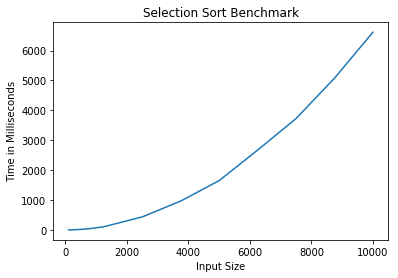

In [39]:
plt.plot('Input', 'Time', data=selectionSortDF)
plt.xlabel("Input Size")
plt.ylabel("Time in Milliseconds")
plt.title("Selection Sort Benchmark")
plt.show()

One can see above that the results mirror an O(n2) complexity time. The curve is flat at low input sizes, but gets much steeper at higher inputs. 

Between 0 and 2000 input sizes is very fast, but 10000 takes over 3 seconds. 

### 2.3 Insertion Sort

**Insertion Sort** is a transposition sorting algorithm, like **Selection Sort**. It is particularly useful for small input sizes, nearly sorted data and for the simplicity of its code. (Heineman et al., 2010, P.61)

It also has better **time complexity** than **Selection Sort**. It is O(n2) in worst and average cases, but O(n) in the best case. It also has O(1) **space complexity**, like **Selection Sort** (bigocheatsheet, n.d).

The algorithm works as follows:

1. It iterates from left to right through the array. 
2. Each item is compared to every item to its left. 
3. It is swapped with each item to its left until it is in its correct sorted position. 
4. When the last item in the array has been swapped to its correct position, the array is sorted. 

See the detailed guide Insertion Sort in this folder.

The Insertion Sort function is displayed below.


In [40]:
def insertionSort(lst): # Taken from https://codereview.stackexchange.com/questions/139056/insertion-sort-in-python
    for index in range(1, len(lst)): # iterate through the array

        currentvalue = lst[index] 
        position = index

        while position > 0 and lst[position - 1] > currentvalue: # while items to its left are smaller and not first item ... continue
            lst[position] = lst[position - 1] # swap item with the item to its left
            position = position - 1 # continue comparing item to item to its left

        lst[position] = currentvalue
    return lst

In [41]:
insertionSort([3,1,7,3,9,2]) # Insertion sort sorts the array

[1, 2, 3, 3, 7, 9]

**Insertion Sort** is benchmarked below and the results are converted into a Pandas DataFrame. They are also visualised using matplotlib. 

In [46]:
isinput = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

istime = array_size(insertionSort, isinput)

In [47]:
insertionSortDF = pd.DataFrame({"Input": isinput, "Time": istime})

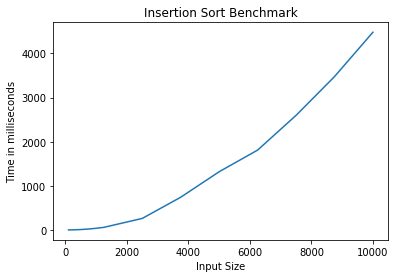

In [48]:
plt.plot('Input', 'Time', data=insertionSortDF)
plt.xlabel("Input Size")
plt.ylabel("Time in milliseconds")
plt.title("Insertion Sort Benchmark")
plt.show()

As the arrays are large and randomly generated and, thus, not nearly sorted, **Insertion Sort** is likely to show a similar quadratic curve to **Selection Sort**. It starts off quite flat but it quickly steeper.

It is likely to be faster than **Selection Sort**, but is still the second slowest algorithm in this study. 

### *2.4 Quick Sort*

**Quick Sort** is a much faster comparison algorithm than **Insertion Sort** or **Selection Sort**. It is a **comparison sort** like the previous two, but is much more efficient. It is commonly used in programming. The C standard library has a function *qsort* which uses this algorithm (Bhargava, A, 2016, P.60).

**Quick sort** uses a divide and conquer strategy to improve **time complexity**. Divide and conquer has two steps (Bhargava, A, 2016, P.54). 

1. Find the simplest case to solve - the base case.  
2. Divide your problem until it reaches the base case. 

For a sorting algorithm, the base case would be an array with 0 or 1 elements. Such an array is already sorted. So a Divide and conquer sorting algorithm recursively divides an array into smaller arrays until the base case is reached.  


**Quick sort's** worst case running time is O(n2), however its average and best cases are O(n log n), much better than **Insertion Sort** and **Selection Sort** (Cormen et al., 2009, p. 170). However, due to its use of recursion, its **space complexity** is worse at O(log n) (bigocheatsheet, n.d).



The algorithm works as follows:

1. Pick an item in the array. This is called a pivot. 
2. Create two sub-arrays. One contains all items greater or equal to pivot. The other contains greater items. 
4. The pivot is now in its final sorted position. 
5. The above operations are recursively called on each of the sub-arrays. 
6. The algorithm stops when the base case is reached: The array contains 0 or 1 elements. 

See the detailed guide Quick Sort in this folder.

The Quick Sort function is displayed below.


In [49]:
# taken from https://github.com/egonSchiele/grokking_algorithms/blob/master/04_quicksort/python/05_quicksort.py
def quickSort(array):
  if len(array) < 2:
    # base case - stops if arrays are empty or have 1 element. Then they are sorted
    return array
  else:
    # recursive case: This continues until the base case is reached.
    pivot = array[0] # The pivot is the first item in the array
    less = [i for i in array[1:] if i <= pivot] # iterates through the array from pivot + 1 to the end. 
                                                # Less is an array of items less or equal to pivot
    greater = [i for i in array[1:] if i > pivot] # greater is an array of items greater than pivot
    return quickSort(less) + [pivot] + quickSort(greater) # Both the less and greater arrays are recursively called



In [50]:
quickSort([3,1,7,3,9,2]) # Quick sort sorts the array

[1, 2, 3, 3, 7, 9]

**Quick Sort** is benchmarked below and the results are converted into a Pandas DataFrame. They are also visualised using matplotlib. 

In [51]:
qsinput = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

qstime = array_size(quickSort, qsinput)


In [52]:
quickSortDF = pd.DataFrame({"Input": qsinput, "Time": qstime})

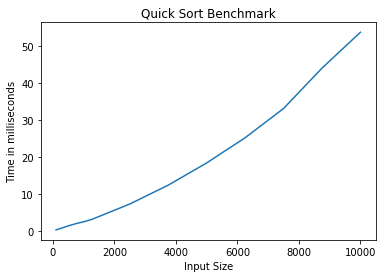

In [53]:
plt.plot('Input', 'Time', data=quickSortDF)
plt.xlabel("Input Size")
plt.ylabel("Time in milliseconds")
plt.title("Quick Sort Benchmark")
plt.show()

Running the above algorithm shows that **Quick Sort** is much faster than **Selection Sort** and **Insertion Sort**. The line is also not as curved as the above algorithms. It is not as steep towards the higher input sizes, showing a result similar to its **time complexity** of O(n log n). 

### *2.5 Pancake Sort*

Pancake sort is an algorithm that has only two operations:

1. Find the maximum in an array
2. Flip or reverse all or part of the array. 

You have a plate of pancakes and a spatula. How do you order the pancakes by size? You cannot easily take an individual pancake from the stack and you cannot insert a pancake into the middle of the stack. 

One solution is to find the biggest, put the spatula underneath it and flip the pancakes over so the biggest is on top. Then flip the whole stack so the biggest is on the bottom. You then repeat this process with the other pancakes. Eventually, you will be able to sort the pancakes, just by flipping them (Walters, A, 2014). 

Pancake Sort appears to have a worst case **time complexity** of O(n2) and a **space complexity** of O(n) (Walters, A, 2014). 

It works as follows:

1. Iterate from the left to right and find the maximum. 
2. Reverse the unsorted array from the first position to the maximum so the maximum is in the left most position. 
3. Reverse the entire array. Now the maximum is on the right most side and is now in sorted position. 
4. Repeat the above again in the unsorted array.
5. The array is sorted when all items are in their sorted position

See the detailed guide Pancake Sort in this folder.

The Pancake Sort function is displayed below.

In [55]:
def pancakeSort(nums): # Taken from https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-18.php
    arr_len = len(nums) # calculates the length of the array - This is the starting array length
    while arr_len > 1: # will stop when the unsorted array is greater than 1 
        mi = nums.index(max(nums[0:arr_len])) # finds the maximum number in the array
        nums = nums[mi::-1] + nums[mi+1:len(nums)] 
        nums = nums[arr_len-1::-1] + nums[arr_len:len(nums)] # reverses the array 
        arr_len -= 1
    return nums

In [56]:
pancakeSort([3,1,7,3,9,2]) # Pancake sort sorts the array

[1, 2, 3, 3, 7, 9]

**Pancake sort** is benchmarked below and the results are converted into a Pandas DataFrame. They are also visualised using matplotlib. 

In [57]:
psinput = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

pstime = array_size(pancakeSort, psinput)

In [59]:
pancakeSortDF = pd.DataFrame({"Input": psinput, "Time": pstime})

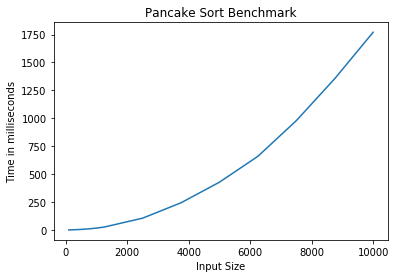

In [60]:
plt.plot('Input', 'Time', data=pancakeSortDF)
plt.xlabel("Input Size")
plt.ylabel("Time in milliseconds")
plt.title("Pancake Sort Benchmark")
plt.show()

The above shows that **Pancake sort** runs in O(n2), similar to **Selection Sort** and **Insertion Sort**. However, it is faster than them both. It is still substantially slower than **Quick Sort**. 

### *2.6 Bucket Sort*

**Bucket Sort** is a **non-comparison sort** sorting algorithm. As we have seen, **comparison sort** algorithms can do no better than O(n log n) (Heineman et al., 2010, P.83). Some **Non-comparison sort** algorithms can theoretically do better than this. **Bucket Sort** can have a best and average **time complexity** of O(n) linear time if certain assumptions are made (Cormen et al., 2009, p. 200). It has an O(n2) in the worst case (bigocheatsheet, n.d). **Bucket Sort** should only be used if the array is uniformly distributed. Clustering makes it less effective. (Heineman et al., 2010, P.83). It has a **space complexity** of O(n), which is the worst of all the algorithms in this project (bigocheatsheet, n.d).

Bucket sort divides a large array into a number of smaller arrays (buckets). Each smaller array contains similar numbers. Another algorithm suitable to sorting small arrays is then used to sort the buckets. 

It works as follows:
1. A number of empty buckets are created based on the length of the array
2. Items in the array are distributed into the bucket based on their closeness to one another.
3. Another sorting algorithm, usually **insertion sort** is then used to sort each bucket. 
4. The buckets are then joined together. 

    

See the detailed guide Bucket Sort in this folder.

The Bucket Sort function is displayed below.


In [61]:
def bucketSort(alist): # Taken from https://www.sanfoundry.com/python-program-implement-bucket-sort/
    largest = max(alist)
    length = len(alist)
    size = largest/length
 
    buckets = [[] for _ in range(length)] # creates empty lists equal to the length of the list
    for i in range(length): # iterates through each item in the array
        j = int(alist[i]/size)# divides the array item by the size, roounds down to the nearest integer 
        if j != length:
            buckets[j].append(alist[i]) # places the array item into the corresponding bucket (calculated above)
        else:
            buckets[length - 1].append(alist[i])# This places the max number in the highest array
 
    for i in range(length): # insertion sort is performed on each bucket
        insertionSort(buckets[i])
 
    result = []
    for i in range(length): # once each bucket is sorted, join them together to created the final unsorted array
        result = result + buckets[i]
 
    return result


 

In [63]:
bucketSort([3,1,7,3,9,2]) # Bucket sort sorts the array

[1, 2, 3, 3, 7, 9]

**Bucket sort** is benchmarked below and the results are converted into a Pandas DataFrame. They are also visualised using matplotlib. 

In [64]:
bsinput = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]

bstime = array_size(bucketSort, bsinput)

In [65]:
bucketSortDF = pd.DataFrame({"Input": bsinput, "Time": bstime})

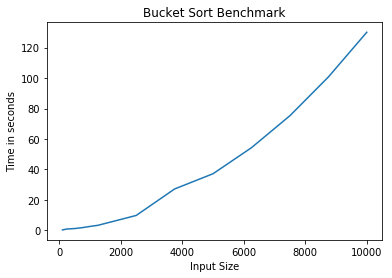

In [66]:
plt.plot('Input', 'Time', data=bucketSortDF)
plt.xlabel("Input Size")
plt.ylabel("Time in seconds")
plt.title("Bucket Sort Benchmark")
plt.show()

**Bucket Sort** does not run in the best case of O(n), though it may not be as steep as the slower algorithms. This suggests that the input data does not match **Bucket Sort's** assumptions of uniformity. 

**Bucket Sort** is, however, very fast. Only **Quick Sort** has performed better in our benchmarks.

## 3. Total Comparison

All of the algorithms have been introduced and benchmarked. Now, i will compare them to each other. A graph and table with the results are displayed below.

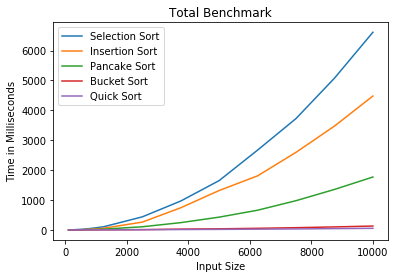

In [67]:
plt.plot('Input', 'Time', label='Selection Sort', data=selectionSortDF)
plt.plot('Input', 'Time', label='Insertion Sort', data=insertionSortDF)
plt.plot('Input', 'Time', label='Pancake Sort', data=pancakeSortDF)
plt.plot('Input', 'Time', label='Bucket Sort', data=bucketSortDF)
plt.plot('Input', 'Time', label='Quick Sort', data=quickSortDF)
plt.xlabel("Input Size")
plt.ylabel("Time in Milliseconds")
plt.title("Total Benchmark")
plt.legend()
plt.show()

The below code is a helper function which adds a name column to the results we generated above. This allows us to differentiate between the different algorithms.

In [69]:
def namecol(df,alg): 
    name = []  
    for i in range(13): # creates a list with the name of the algorithm
        name.append(str(alg)) # The list has 13 elements, equal to the number of averages
    name = pd.DataFrame(name)
    name.columns = ['Algorithm'] # The new algorithm column is joined to the dataframe
    df2 = name.join(df)
    return df2


The above function is ran on each of the results. They each now have a column with their algorithm names. The columns are then joined together using the concat function created a final combined dataframe.

In [70]:
insertionSortDF2 = namecol(insertionSortDF,"Insertion Sort")
selectionSortDF2 = namecol(selectionSortDF,"Selection Sort")
pancakeSortDF2 = namecol(pancakeSortDF,"Pancake Sort")
bucketSortDF2 = namecol(bucketSortDF,"Bucket Sort")
quickSortDF2 = namecol(quickSortDF,"Quick Sort")

        

In [32]:
combinedDF = pd.concat([insertionSortDF2, selectionSortDF2, pancakeSortDF2, bucketSortDF2, quickSortDF2], ignore_index=True)




Python's pivot function is then used to create a table to view the results of the benchmark comparison. The time is in milliseconds.

In [73]:
pd.pivot_table(combinedDF,index=["Algorithm"], columns=["Input"], values=["Time"]) # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

Time                                                        \
Input          100   250   500   750   1000   1250   2500    3750    5000    
Algorithm                                                                    
Bucket Sort      0.4   1.2   2.7   4.3   6.5    8.3   25.4    51.7    84.9   
Insertion Sort   0.7   5.5  22.1  51.6  95.4  147.6  601.0  1382.8  2407.3   
Pancake Sort     0.9   4.2  12.7  26.3  40.7   67.2  256.4   575.9  1074.6   
Quick Sort       0.5   1.3   2.9   4.6   6.5    8.2   19.3    31.2    47.5   
Selection Sort   1.1   5.3  16.9  40.5  70.9  109.8  398.8   962.9  1652.9   

                                                
Input            6250    7500    8750    10000  
Algorithm                                       
Bucket Sort      135.7   191.8   251.3   323.6  
Insertion Sort  3821.8  5550.2  7571.1  9892.1  
Pancake Sort    1653.0  2411.5  3264.2  4319.1  
Quick Sort        64.1    68.1   109.9   134.2  
Selection Sort  2582.8  3765.2  5005.6  6588.2

## 3. Conclusion

The above graph and table show the results of the benchmark tests. At the lowest input size of 100, the time it takes to sort the array is very similar. However, at higher input sizes, the differences between the algorithms increases dramatically. 

**Insertion Sort** is the slowest overall algorithm, particularly at the highest input sizes. However, it performs very similar to **Quick Sort** at input size 100. 

**Selection Sort** is the slowest at input size 100, but performs reasonably better than it at higher input sizes. 

Both **Insertion Sort** and **Selection Sort** are by far the worst performing algorithms. Their time also increases exponentially, mirroring their **time complexity**

**Pancake Sort** is in the middle in terms of performance in this project. It is substantially better than the previous two algorithms, but still much slower than **Bucket Sort** and **Quick Sort**. It does, however, appear to run in similar to O(n2) time. 

**Bucket Sort** is much faster than the previous three and competes well with **Quick Sort** in this test, though still a good deal slower. It also appears to perform better than O(n2), though not quite O(n log n) like **Quick Sort**

**Quick Sort** is easily the fastest algorithm in this benchmark test. It also runs in (or close to) O(n log n) time. 

##  4. References